In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Dropout, GaussianNoise, Conv1D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test = pd.read_csv('test/test.csv')
train = pd.read_csv('train/train.csv')

Y_train = train['label'].values.astype('int32')
Y_train = np_utils.to_categorical(Y_train) 
train.drop(['label'], axis=1, inplace=True)

X_train = (train.values).astype('float32')
X_test = (test.values).astype('float32')

Y_train value form: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Which is 0 (1 in [0] position of the vector).


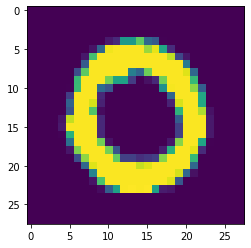

In [3]:
print('Y_train value form: {}'.format(Y_train[1]))
print('Which is 0 (1 in [0] position of the vector).')
plt.imshow(X_train[1].reshape(28,28))
plt.show()

In [4]:
scaler = StandardScaler()
scaler.fit(X_train)
X_sc_train = scaler.transform(X_train)
X_sc_test = scaler.transform(X_test)

Text(0, 0.5, 'Cumulative explained variance')

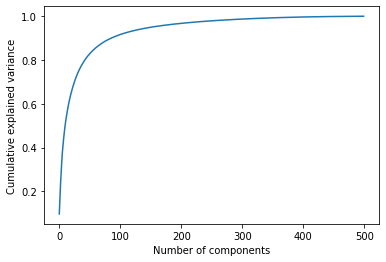

In [5]:
pca = PCA(n_components=500)
pca.fit(X_train)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [6]:
NCOMPONENTS = 100

pca = PCA(n_components=NCOMPONENTS)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)
pca_std = np.std(X_pca_train)

print(X_sc_train.shape)
print(X_pca_train.shape)

(42000, 784)
(42000, 100)


In [7]:
inv_pca = pca.inverse_transform(X_pca_train)
inv_sc = scaler.inverse_transform(inv_pca)

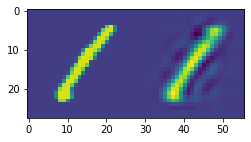

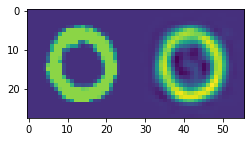

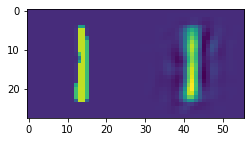

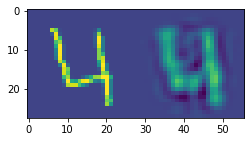

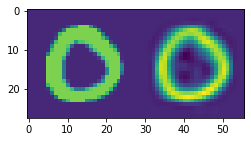

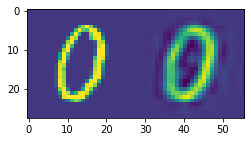

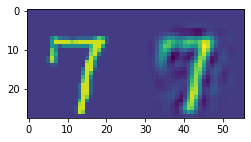

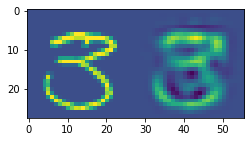

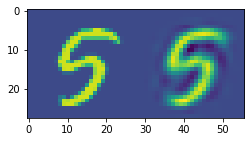

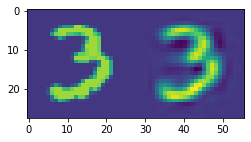

In [8]:
def side_by_side(indexes):
    org = X_train[indexes].reshape(28,28)
    rec = inv_sc[indexes].reshape(28,28)
    pair = np.concatenate((org, rec), axis=1)
    plt.figure(figsize=(4,2))
    plt.imshow(pair)
    plt.show()
    
for index in range(0,10):
    side_by_side(index)

In [9]:
model = Sequential()
layers = 1
units = 128

model.add(Dense(units, input_dim=NCOMPONENTS, activation='relu'))
model.add(GaussianNoise(pca_std))
for i in range(layers):
    model.add(Dense(units, activation='relu'))
    model.add(GaussianNoise(pca_std))
    model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['categorical_accuracy'])

model.fit(X_pca_train, Y_train, epochs=100, batch_size=256, validation_split=0.15, verbose=2)

Epoch 1/100
140/140 - 48s - loss: 2.4808 - categorical_accuracy: 0.4939 - val_loss: 0.4007 - val_categorical_accuracy: 0.8902
Epoch 2/100
140/140 - 1s - loss: 0.8554 - categorical_accuracy: 0.7881 - val_loss: 0.3337 - val_categorical_accuracy: 0.9103
Epoch 3/100
140/140 - 1s - loss: 0.5618 - categorical_accuracy: 0.8471 - val_loss: 0.2673 - val_categorical_accuracy: 0.9243
Epoch 4/100
140/140 - 1s - loss: 0.4300 - categorical_accuracy: 0.8726 - val_loss: 0.2311 - val_categorical_accuracy: 0.9329
Epoch 5/100
140/140 - 1s - loss: 0.3510 - categorical_accuracy: 0.8933 - val_loss: 0.2090 - val_categorical_accuracy: 0.9392
Epoch 6/100
140/140 - 1s - loss: 0.3046 - categorical_accuracy: 0.9062 - val_loss: 0.1917 - val_categorical_accuracy: 0.9405
Epoch 7/100
140/140 - 1s - loss: 0.2696 - categorical_accuracy: 0.9168 - val_loss: 0.1728 - val_categorical_accuracy: 0.9471
Epoch 8/100
140/140 - 1s - loss: 0.2405 - categorical_accuracy: 0.9233 - val_loss: 0.1622 - val_categorical_accuracy: 0.9481

140/140 - 1s - loss: 0.0439 - categorical_accuracy: 0.9849 - val_loss: 0.1129 - val_categorical_accuracy: 0.9762
Epoch 67/100
140/140 - 1s - loss: 0.0423 - categorical_accuracy: 0.9860 - val_loss: 0.1154 - val_categorical_accuracy: 0.9754
Epoch 68/100
140/140 - 1s - loss: 0.0435 - categorical_accuracy: 0.9856 - val_loss: 0.1079 - val_categorical_accuracy: 0.9765
Epoch 69/100
140/140 - 1s - loss: 0.0404 - categorical_accuracy: 0.9863 - val_loss: 0.1082 - val_categorical_accuracy: 0.9762
Epoch 70/100
140/140 - 1s - loss: 0.0401 - categorical_accuracy: 0.9862 - val_loss: 0.1086 - val_categorical_accuracy: 0.9765
Epoch 71/100
140/140 - 1s - loss: 0.0410 - categorical_accuracy: 0.9860 - val_loss: 0.1059 - val_categorical_accuracy: 0.9765
Epoch 72/100
140/140 - 1s - loss: 0.0371 - categorical_accuracy: 0.9869 - val_loss: 0.1193 - val_categorical_accuracy: 0.9744
Epoch 73/100
140/140 - 1s - loss: 0.0411 - categorical_accuracy: 0.9869 - val_loss: 0.1111 - val_categorical_accuracy: 0.9751
Epoch

In [10]:
predictions = model.predict_classes(X_pca_test, verbose=0)

def write_predictions(predictions, fname):
    pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)), "Label": predictions}).to_csv(fname, index=False, header=True)

write_predictions(predictions, "pca-keras-mlp.csv")

c:\users\ptpn6\appdata\local\programs\python\python39\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
